In [ ]:
import kagglehub
kagglehub.login()

# Download latest version
path = kagglehub.dataset_download("mirichoi0218/insurance")

print("Path to dataset files:", path)

100%|██████████| 16.0k/16.0k [00:00<00:00, 5.50MB/s]

Extracting files...
Path to dataset files: C:\Users\panag\.cache\kagglehub\datasets\mirichoi0218\insurance\versions\1


Kaggle credentials set.
Kaggle credentials successfully validated.


In [2]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# Load the dataset-DATA INGESTION

In [3]:
df = pd.read_csv("/kaggle/input/insurance/insurance.csv")

## Printing the first 10 rows

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Shape of the dataset

In [7]:
df.shape

(1338, 7)

## Data Validation

In [8]:
df.isna().sum()

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [16]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [14]:
num =[]
cat=[]

for col in df.columns:
    if df[col].dtype!='object':
        num.append(col)
    elif df[col].dtype=='object':
        cat.append(col)
print(num)
print(cat)


['age', 'bmi', 'children', 'charges']
['sex', 'smoker', 'region']


In [75]:
import matplotlib.pyplot as plt

In [18]:
import seaborn as sns

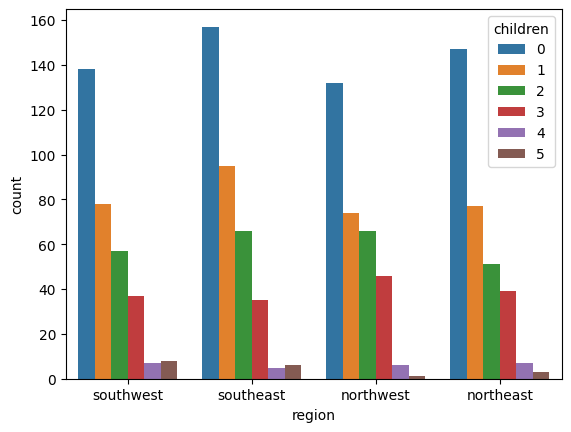

In [19]:
ax = sns.countplot(df,x='region',hue='children')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


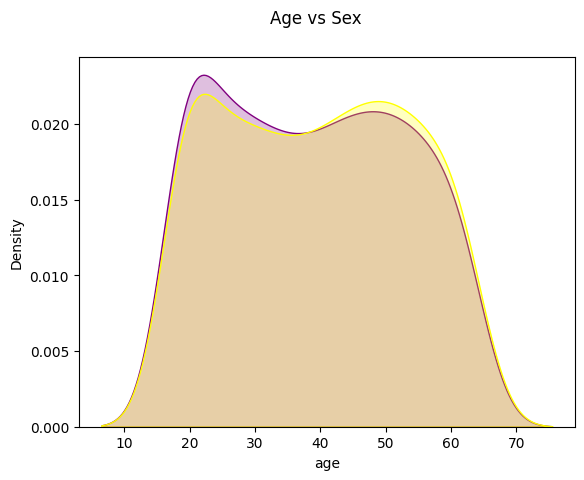

In [25]:
fig, ax = plt.subplots()

sns.kdeplot(df[df["sex"]== 'male']["age"], fill = True, color = "purple",label="Male",ax=ax)
sns.kdeplot(df[df["sex"]== 'female']["age"], fill = True, color = "yellow",label="Female",ax=ax)

ax.set_xlabel("age")
ax.set_ylabel("Density")

fig.suptitle("Age vs Sex ");

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0.98, 'Density of the BMI values')

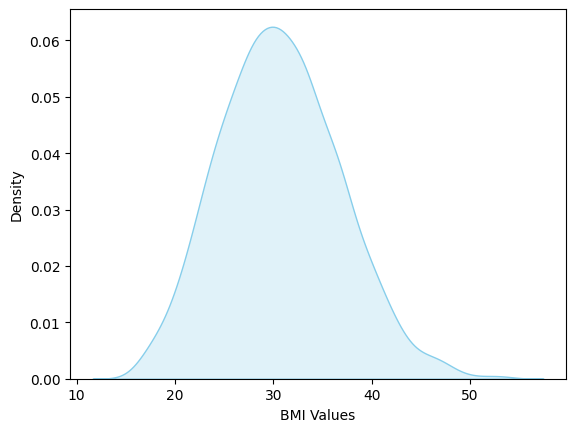

In [28]:
ax = sns.kdeplot(df['bmi'],fill=True,color='skyblue')

ax.set_xlabel("BMI Values")
ax.set_ylabel("Density")

fig.suptitle("Density of the BMI values")





,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


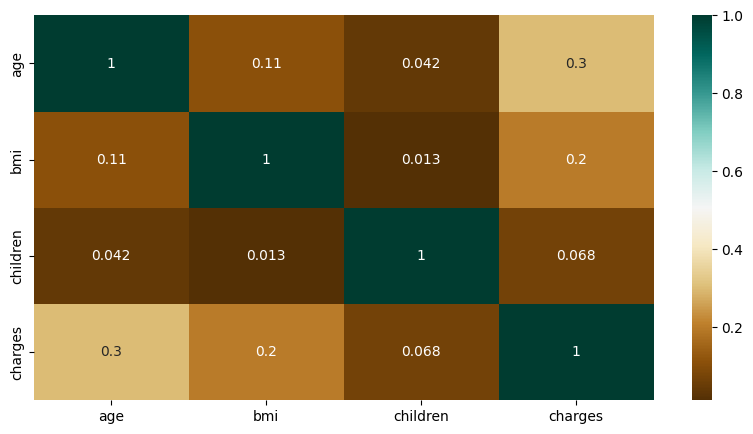

In [32]:
plt.figure(figsize=(10,5))
c= df[num].corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

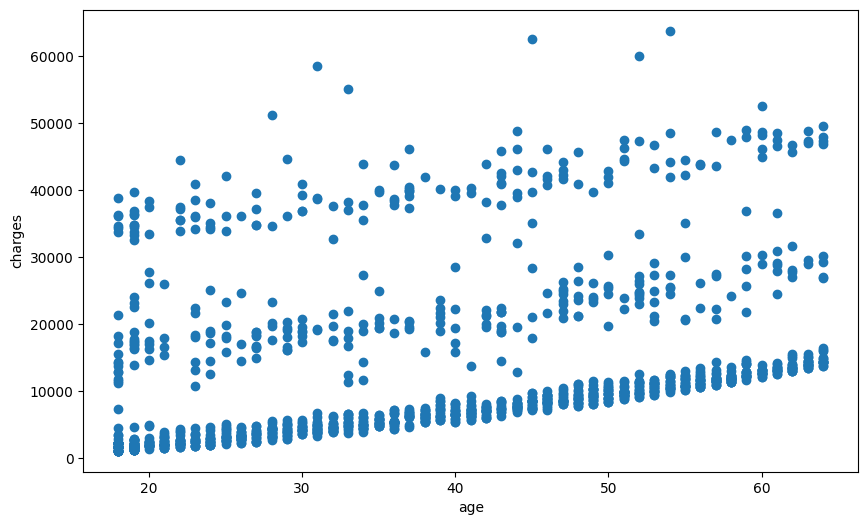

In [33]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['age'], df['charges'])
ax.set_xlabel('age')
ax.set_ylabel('charges')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0.98, 'The desnity of Age')

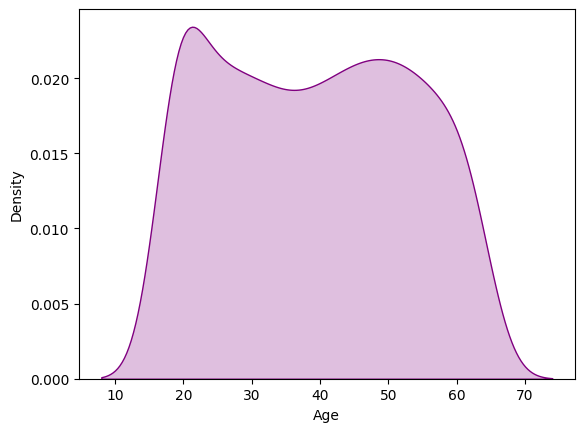

In [36]:
ax = sns.kdeplot(df['age'],fill=True,color='purple')
ax.set_xlabel("Age")
ax.set_ylabel("Density")

fig.suptitle('The desnity of Age')


In [34]:
for i in cat:
    print(f"The categories in {i} column is:", end=" ")
    print(df[i].unique())

The categories in sex column is: ['female' 'male']
The categories in smoker column is: ['yes' 'no']
The categories in region column is: ['southwest' 'southeast' 'northwest' 'northeast']


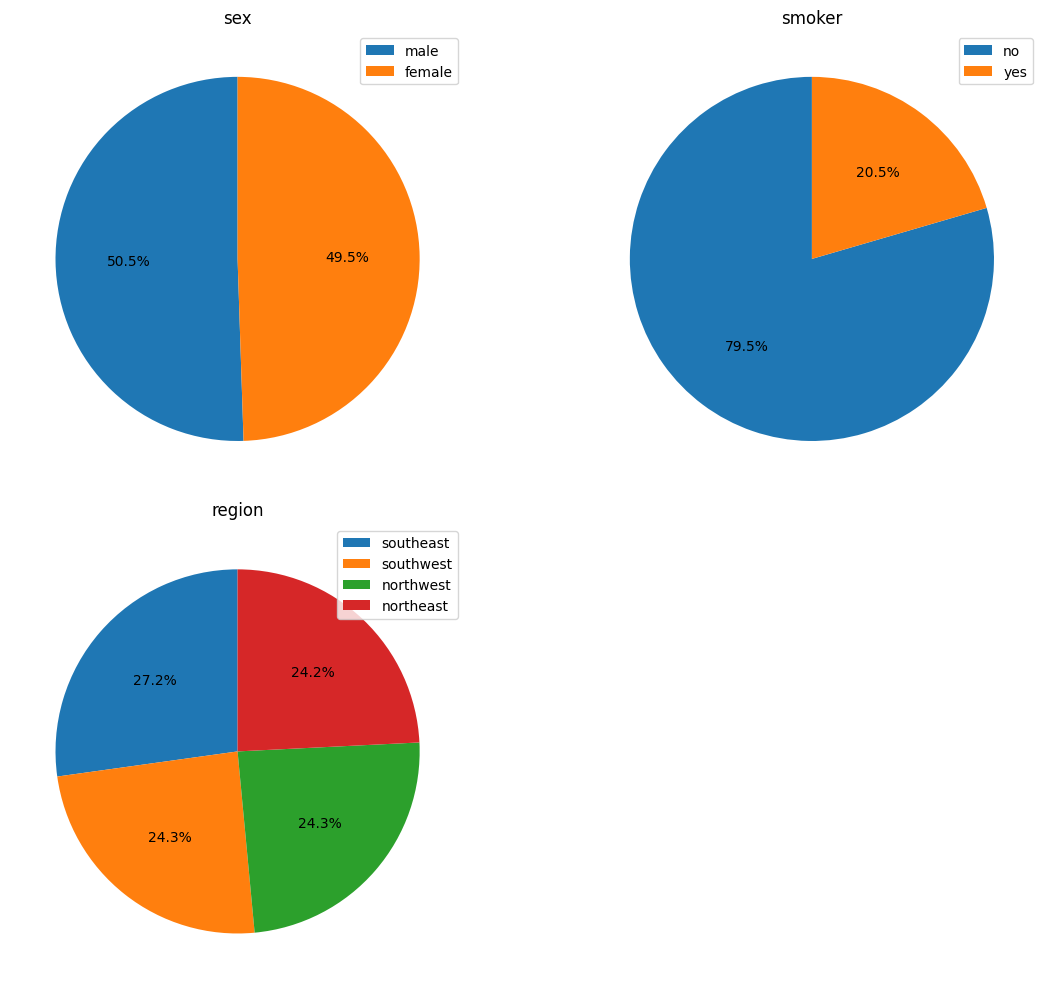

In [8]:
fig , axes = plt.subplots(2,2, figsize =(12,10))

axes[0,0].pie((df['sex']).value_counts(),
             autopct='%1.1f%%',
              startangle=90)

axes[0,0].set_title("sex")
axes[0,0].legend(labels = df['sex'].value_counts().index , loc = 'upper right')


axes[0,1].pie((df['smoker']).value_counts(),
             autopct='%1.1f%%',
              startangle=90)

axes[0,1].set_title("smoker")
axes[0,1].legend(labels = df['smoker'].value_counts().index , loc = 'upper right')

axes[1,0].pie((df['region']).value_counts(),
             autopct='%1.1f%%',
              startangle=90)

axes[1,0].set_title("region")
axes[1,0].legend(labels = df['region'].value_counts().index , loc = 'upper right')


fig.delaxes(axes[1,1])
plt.tight_layout()
plt.show()

In [6]:
df_copy = df.copy()
row_index =0

for i in df_copy['bmi']:
    if i<18.5:
        df_copy.loc[row_index,'bmi'] = 'underweight'
    elif (i>=18.5)&(i<25):
        df_copy.loc[row_index,'bmi'] ='Normal Weight'
    elif (i>=25) & (i<30):
        df_copy.loc[row_index,'bmi']='Overweight'
    elif i>=30:
        df_copy.loc[row_index,'bmi']='Obesity'
    row_index+=1

df_copy.head()
    

<ipython-input-6-afa794d64a0d>:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Overweight' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_copy.loc[row_index,'bmi']='Overweight'


,age,sex,bmi,children,smoker,region,charges
0,19,female,Overweight,0,yes,southwest,16884.92400
1,18,male,Obesity,1,no,southeast,1725.55230
2,28,male,Obesity,3,no,southeast,4449.46200
3,33,male,Normal Weight,0,no,northwest,21984.47061
4,32,male,Overweight,0,no,northwest,3866.85520


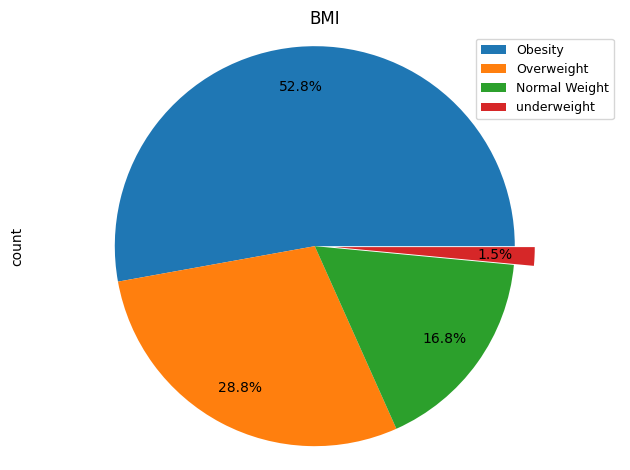

In [7]:
df_copy["bmi"].value_counts().plot(kind="pie",autopct='%1.1f%%',
                             pctdistance=.8,labels=None, explode=[0,0,0,.1])
plt.title('BMI')
plt.axis('equal')
plt.legend(labels=df_copy["bmi"].value_counts().index, loc='upper right', fontsize=9)
plt.tight_layout()
plt.show()

bmi,Normal Weight,Obesity,Overweight,underweight
charge,10409.337709,15552.335469,10987.509891,8852.200585


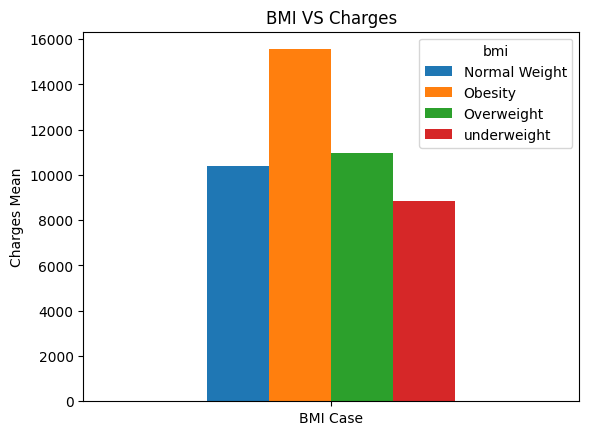

In [8]:
bmi_charges = df_copy.groupby(["bmi"]).agg(
    charge = ("charges", "mean")
).reset_index()

bmi_charges.set_index("bmi", inplace = True)
bmi_charges = bmi_charges.transpose()
display(bmi_charges)
ax = bmi_charges.plot(kind="bar")
plt.title("BMI VS Charges")
ax.set_xticks([0])
ax.set_xticklabels(["BMI Case"])
plt.xticks(rotation=0)
plt.ylabel("Charges Mean")
plt.show()

## Predictive Modelling

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [43]:
X= df.drop('charges', axis=1)


X.head(20)


,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
5,31,female,25.740,0,no,southeast
6,46,female,33.440,1,no,southeast
7,37,female,27.740,3,no,northwest
8,37,male,29.830,2,no,northeast
9,60,female,25.840,0,no,northwest


In [44]:
y = df['charges']
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [69]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Data Preprocess

In [64]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1070 entries, 621 to 684
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1070 non-null   int64  
 1   sex       1070 non-null   object 
 2   bmi       1070 non-null   float64
 3   children  1070 non-null   int64  
 4   smoker    1070 non-null   object 
 5   region    1070 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 58.5+ KB


In [65]:
X_train.sample(10)

,age,sex,bmi,children,smoker,region
1003,48,male,29.600,0,no,southwest
1222,50,male,25.300,0,no,southeast
1048,25,female,22.515,1,no,northwest
721,53,male,36.600,3,no,southwest
555,28,male,23.800,2,no,southwest
114,52,male,32.205,3,no,northeast
763,27,male,26.030,0,no,northeast
7,37,female,27.740,3,no,northwest
100,41,female,31.600,0,no,southwest
543,54,female,47.410,0,yes,southeast


In [18]:
X[X.isnull().any(axis=1)]

,age,sex,bmi,children,smoker,region


In [15]:
X_train.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

In [70]:
categorical_columns = X.select_dtypes(include=['object']).columns  
numerical_columns = X.select_dtypes(exclude=['object']).columns 


In [60]:
X_train['sex'].unique()

array(['female', 'male'], dtype=object)

### Pipeline Creation : Pipeline is a way to streamline the process of applying a series of transformations and models in a structured way.

In [71]:
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), numerical_columns) , 
        ('onehot', OneHotEncoder(), categorical_columns)                 
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('model', LinearRegression())   
])

In [72]:
pipeline.fit(x_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  Index(['age', 'bmi', 'children'], dtype='object')),
                                                 ('onehot', OneHotEncoder(),
                                                  Index(['sex', 'smoker', 'region'], dtype='object'))])),
                ('model', LinearRegression())])

In [73]:
yhat_mlr = pipeline.predict(x_test)

## Model Evaluation -MLR

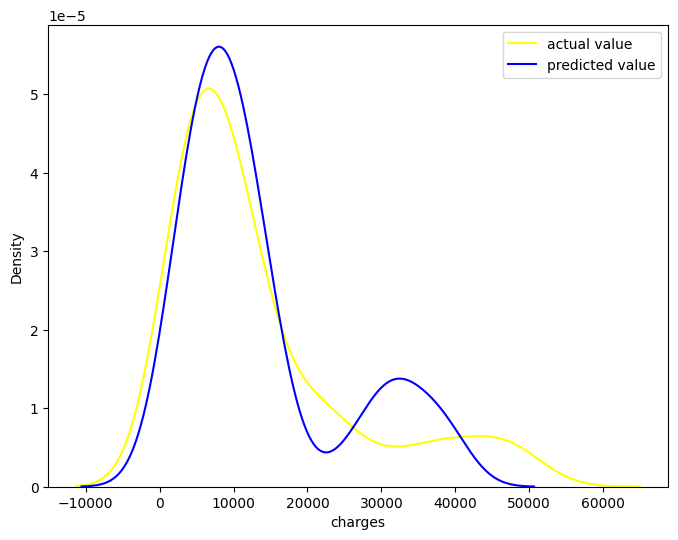

In [79]:
import warnings
import seaborn as sns
warnings.filterwarnings('ignore' ,category=FutureWarning)

plt.figure(figsize=(8,6))
ax = sns.kdeplot(y_test,color ='yellow',label='actual value')
ax = sns.kdeplot(yhat_mlr,color ='blue',label='predicted value',ax=ax)

plt.legend()
plt.show()


In [80]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse_mlr =mean_squared_error(y_test,yhat_mlr)
r2_mlr=r2_score(y_test,yhat_mlr)

print(f" MSE for MLR:{mse_mlr} , R2 :{r2_mlr}")

 MSE for MLR:31827950.22952384 , R2 :0.7999876970680433


## Modelling with Polynomial Regression

In [82]:
from sklearn.preprocessing import PolynomialFeatures

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('polynomial', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
])

pipeline.fit(x_train,y_train)
yhat_poly = pipeline.predict(x_test)

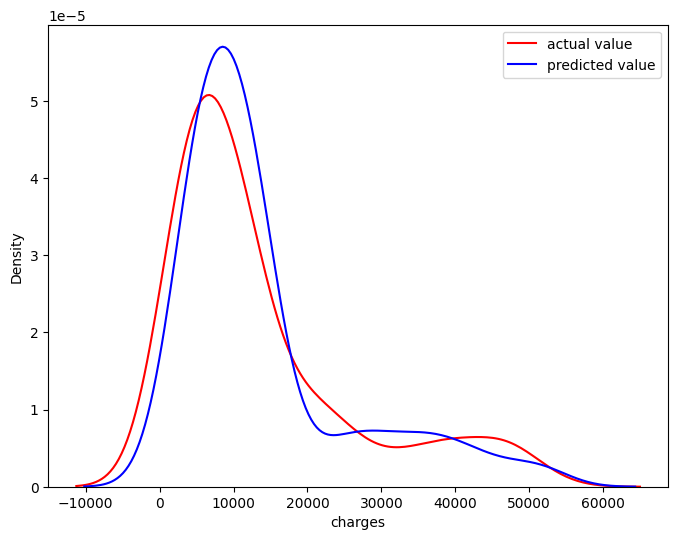

In [84]:
plt.figure(figsize=(8, 6))
ax = sns.kdeplot(y_test, color='red', label='actual value')
sns.kdeplot(yhat_poly, color='blue', label='predicted value', ax=ax)
plt.legend()
plt.show()

In [83]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse_poly =mean_squared_error(y_test,yhat_poly)
r2_poly=r2_score(y_test,yhat_poly)

print(f" MSE for poly:{mse_poly} , R2 :{r2_poly}")

 MSE for poly:19141119.29399785 , R2 :0.8797139205296195


In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('model', RandomForestRegressor(100))   
])

pipeline.fit(x_train, y_train)
yhat_ran = pipeline.predict(x_test)

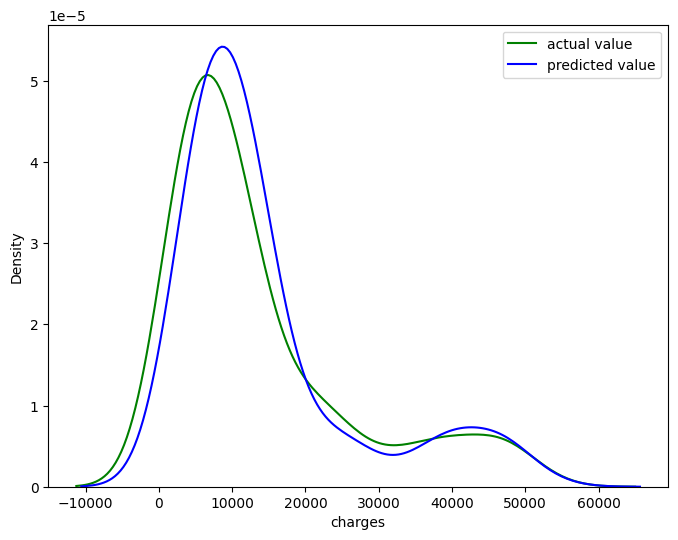

In [86]:
plt.figure(figsize=(8, 6))
ax = sns.kdeplot(y_test, color='green', label='actual value')
sns.kdeplot(yhat_ran, color='blue', label='predicted value', ax=ax)
plt.legend()
plt.show()

In [87]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse_ran =mean_squared_error(y_test,yhat_ran)
r2_ran=r2_score(y_test,yhat_ran)

print(f" MSE for poly:{mse_ran} , R2 :{r2_ran}")

 MSE for poly:19418292.831554554 , R2 :0.8779721144391007


## Compairing all the model prediction values 

In [89]:
index=["MSE", "R2"]
model_eva = {"Mlr":[mse_mlr, r2_mlr],
             "PR":[mse_poly, r2_poly],
             "RFR":[mse_ran, r2_ran]}

model_eva = pd.DataFrame(model_eva)
model_eva.index = index
model_eva = model_eva.transpose()
model_eva

,MSE,R2
Mlr,3.182795e+07,0.799988
PR,1.914112e+07,0.879714
RFR,1.941829e+07,0.877972


In [90]:
best_model = model_eva[(model_eva["MSE"] == model_eva["MSE"].min()) & (model_eva["R2"] == model_eva["R2"].max())]
best_model

,MSE,R2
PR,1.914112e+07,0.879714


### The model the Polynomial Regression wins !!
